# Рубежный контроль
## Выполнил: ИУ5-24М Лычагин Дмитрий
## Вариант: *8* 
## Номер задачи №1: *8*	Номер задачи №2: *28*

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv('metro_countries_cities.csv')

In [5]:
df.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


## Задача 1
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения модой.

In [21]:
df['stations'] = df['stations'].fillna(int(stats.mode(df['stations'])[0]))

## Задача 2
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе межквартильного размаха.

In [23]:
np.quantile(df['stations'], 0.95)

242.7499999999999

In [28]:
df['stations'] = np.where(df['stations'] > np.quantile(df['stations'], 0.95), np.quantile(df['stations'], 0.95) - np.quantile(df['stations'], 0.05), df['stations'])
df['stations'] = np.where(df['stations'] < np.quantile(df['stations'], 0.05), np.quantile(df['stations'], 0.95) - np.quantile(df['stations'], 0.05), df['stations'])

In [29]:
df

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19.0,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90.0,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10.0,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13.0,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98.0,833,459.80,europe
...,...,...,...,...,...,...,...,...,...
193,San Juan,United States,Tren Urbano,2004,2005,16.0,172,1.10,north_america
194,"Washington, D.C.",United States,Washington Metro,1976,2014,91.0,188,68.10,north_america
195,Tashkent,Uzbekistan,Tashkent Metro,1977,2020,39.0,571,38.80,asia
196,Caracas,Venezuela,Caracas Metro,1983,2015,52.0,672,358.00,latin_america


## Задача 3
Для студентов группы ИУ5-24М, ИУ5И-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='stations'>

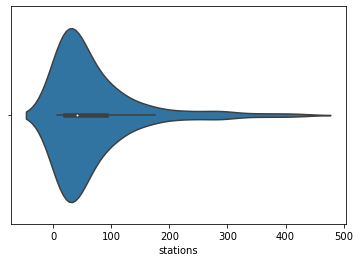

In [4]:
sns.violinplot(x=df['stations'])